In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
directory = '/content/drive/MyDrive/Colab Notebooks/HandGesture/images'

In [ ]:
Name=[]
for file in os.listdir(directory):
    if file[-4:]!='pt.m' and file[-4:]!='.txt':
        Name+=[file]
print(Name)
print(len(Name))

['up', 'okay', 'rock', 'rock_on', 'scissor', 'paper', 'thumbs', 'peace', 'fingers_crossed', 'call_me']
10


In [ ]:
N=[]
for i in range(len(Name)):
    N+=[i]

normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

def mapper(value):
    return reverse_mapping[value]

File=[]
for file in os.listdir(directory):
    File+=[file]
    print(file)

up
okay
rock
rock_on
scissor
paper
thumbs
peace
fingers_crossed
call_me


In [ ]:
dataset=[]
testset=[]
count=0
for file in File:
    path=os.path.join(directory,file)
    t=0
    for im in os.listdir(path):
        if im[-4:]!='pt.m' and im[-4:]!='.txt':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(60,60))
            image=img_to_array(image)
            image=image/255.0
            if t<400:
                dataset.append([image,count])
            else:
                testset.append([image,count])
            t+=1
    count=count+1

In [ ]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [ ]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [ ]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [ ]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [ ]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(1877, 60, 60, 3)
(470, 60, 60, 3)
(1877, 8)
(470, 8)


In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [ ]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(60,60,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74836368/74836368 [==============================] - 1s 0us/step


In [ ]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(8, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
his = model.fit(datagen.flow(trainx, trainy, batch_size=32), validation_data=(testx, testy), epochs=20)

Epoch 1/20
59/59 [==============================] - 55s 711ms/step - loss: 1.4557 - accuracy: 0.4337 - val_loss: 1.1954 - val_accuracy: 0.5936
Epoch 2/20
59/59 [==============================] - 37s 631ms/step - loss: 1.0546 - accuracy: 0.6105 - val_loss: 0.8732 - val_accuracy: 0.7085
Epoch 3/20
59/59 [==============================] - 35s 601ms/step - loss: 0.9463 - accuracy: 0.6452 - val_loss: 0.7338 - val_accuracy: 0.7681
Epoch 4/20
59/59 [==============================] - 32s 544ms/step - loss: 0.8731 - accuracy: 0.6905 - val_loss: 0.5616 - val_accuracy: 0.8596
Epoch 5/20
59/59 [==============================] - 37s 630ms/step - loss: 0.7994 - accuracy: 0.7059 - val_loss: 0.5285 - val_accuracy: 0.8638
Epoch 6/20
59/59 [==============================] - 37s 629ms/step - loss: 0.7647 - accuracy: 0.7315 - val_loss: 0.4687 - val_accuracy: 0.8617
Epoch 7/20
59/59 [==============================] - 37s 629ms/step - loss: 0.7107 - accuracy: 0.7624 - val_loss: 0.4472 - val_accuracy: 0.8830

In [ ]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

15/15 [==============================] - 14s 712ms/step
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        78
           2       0.99      0.97      0.98        87
           3       0.90      0.87      0.88        75
           4       0.96      0.85      0.90        78
           6       0.96      0.94      0.95        90
           7       0.78      1.00      0.88        62

    accuracy                           0.92       470
   macro avg       0.92      0.92      0.92       470
weighted avg       0.93      0.92      0.92       470



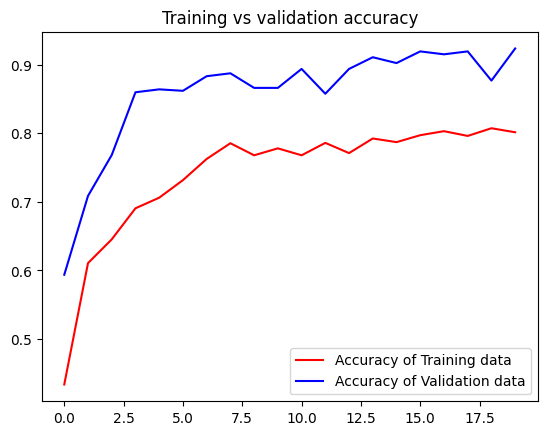

<Figure size 640x480 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

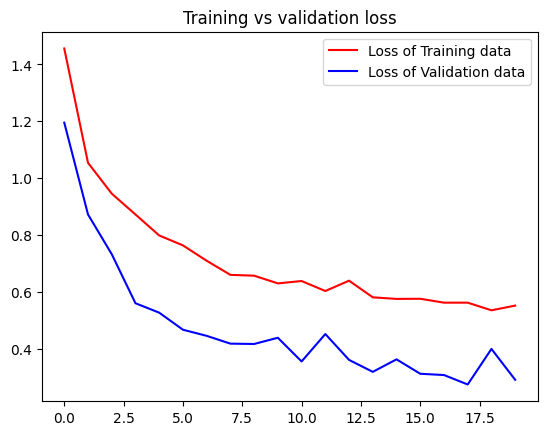

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

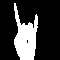

In [ ]:
load_img("/content/drive/MyDrive/Colab Notebooks/HandGesture/images/rock_on/1317.jpg",target_size=(60,60))

In [ ]:
image=load_img("/content/drive/MyDrive/Colab Notebooks/HandGesture/images/rock_on/1317.jpg",target_size=(60,60))

image=img_to_array(image)
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [ ]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 102ms/step
Prediction is rock_on.


In [ ]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)
    PRED+=[value2]

(607, 60, 60, 3)
19/19 [==============================] - 9s 462ms/step
(607, 8)


In [ ]:
ANS=tlabels0

In [ ]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.9093904448105437


Model Save And Load

In [ ]:
model.save('handgest.hdf5')
model2 = keras.models.load_model('handgest.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
prediction3=model2.predict(test)

PRED3=[]
for item in prediction3:
    value3=np.argmax(item)
    PRED3+=[value3]

19/19 [==============================] - 18s 774ms/step


In [ ]:
accuracy3=accuracy_score(ANS,PRED3)
print(accuracy3)

0.9093904448105437
